In [180]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [181]:
money = pd.read_csv("USD_CURRENCY_HISTORY.csv")
values = money["curs"]

In [182]:
past = 7 * 4 # 4 недели до
future = 7 # На неделю вперед 

In [183]:
buff_df = []

for i in range(past,len(values)-future):
    buff = values[(i-past):(i+future)]
    buff_df.append(list(buff))

In [184]:
past_columns = [f"past_{i}" for i in range(past)]
future_columns = [f"future_{i}" for i in range(future)]

In [185]:
df = pd.DataFrame(buff_df, columns = (past_columns+future_columns))

In [186]:
X = df[past_columns][:-1] # на основе их делать предсказание
y = df[future_columns][:-1] # их будем предсказывать

In [187]:
X_test = df[past_columns][-1:]
y_test = df[future_columns][-1:] # для проверки

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
LinReg = LinearRegression() # можно настроить 

In [190]:
LinReg.fit(X,y) # обучение

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [191]:
prediction_LinReg = LinReg.predict(X_test)[0]

In [192]:
np.linalg.norm(y_test - prediction_LinReg)

1.1950827395156176

In [193]:
type(y_test.values[0]) # .values Преобразование dataFrame в Numpy array

numpy.ndarray

In [194]:
sklearn.metrics.mean_absolute_error(y_test.values[0],prediction_LinReg)

0.39069872464913097

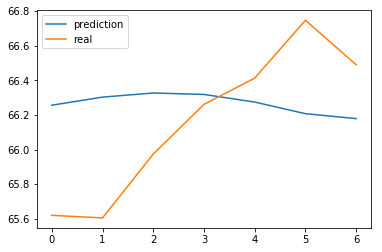

In [195]:
plt.plot(prediction_LinReg, label = "prediction")
plt.plot(y_test.values[0], label = "real")
plt.legend()

In [196]:
from sklearn.neighbors import KNeighborsRegressor

In [197]:
KNN = KNeighborsRegressor(n_neighbors = 2, 
                          algorithm = 'auto',
                          leaf_size = 30, 
                          metric = 'minkowski',
                          metric_params = None,
                          weights = 'uniform')
KNN.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [198]:
prediction_KNN = KNN.predict(X_test)[0]

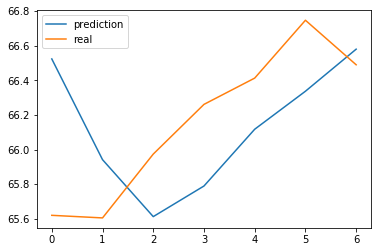

In [199]:
plt.plot(prediction_KNN, label = "prediction")
plt.plot(y_test.values[0], label = "real")
plt.legend()

In [200]:
sklearn.metrics.mean_absolute_error(y_test.values[0],prediction_KNN)

0.4099785714285754

In [201]:
# Тестирование GridSearch
from sklearn.grid_search import GridSearchCV
n_neighbors = [1, 2, 3, 5, 7, 9, 10, 15, 20, 25, 30]
knn = KNeighborsRegressor()
grid = GridSearchCV(estimator = knn, param_grid={'n_neighbors': n_neighbors})
grid.fit(X, y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 5, 7, 9, 10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
-1.2717682241099242
15


In [202]:
from sklearn.neural_network import MLPRegressor

In [203]:
MLP = MLPRegressor(solver='lbfgs', 
                   hidden_layer_sizes=50,
                   max_iter=10000, 
                   shuffle=False, 
                   random_state=9876, 
                   activation='relu')

In [204]:
MLP.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=9876,
       shuffle=False, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [205]:
prediction_MLP = MLP.predict(X_test)[0]

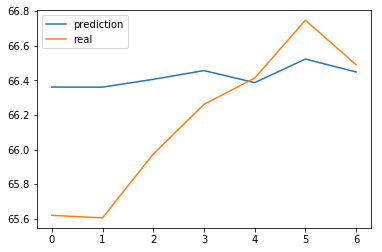

In [206]:
plt.plot(prediction_MLP, label = "prediction")
plt.plot(y_test.values[0], label = "real")
plt.legend()

In [207]:
sklearn.metrics.mean_absolute_error(y_test.values[0],prediction_MLP)

0.34527503228575945

In [208]:
#Номер 3 дз, еще два алгоритма

In [218]:
from sklearn.linear_model import ElasticNet

In [277]:
EN = ElasticNet(alpha=0.01, l1_ratio=0.9).fit(X,y)

In [278]:
prediction_EN = EN.predict(X_test)[0]

In [279]:
sklearn.metrics.mean_absolute_error(y_test.values[0],prediction_EN)

0.3780704636908792

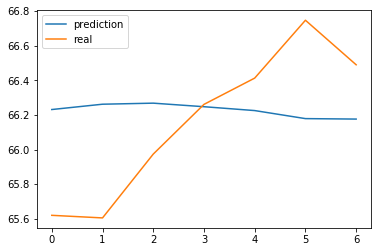

In [280]:
plt.plot(prediction_EN, label = "prediction")
plt.plot(y_test.values[0], label = "real")
plt.legend()

In [283]:
# Тестирование GridSearch
from sklearn.grid_search import GridSearchCV
#l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alpha = [0.01, 0.05, 0.001, 0.1, 0.2, 0.5, 0.9]
E = ElasticNet()
grid1 = GridSearchCV(estimator = E, param_grid={'alpha': alpha})
grid1.fit(X, y)
print(grid1)
print(grid1.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.05, 0.001, 0.1, 0.2, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.01


In [359]:
from sklearn.linear_model import Lasso

In [360]:
LS = Lasso(alpha = 0.01).fit(X,y)

In [361]:
prediction_LS = LS.predict(X_test)[0]

In [362]:
sklearn.metrics.mean_absolute_error(y_test.values[0],prediction_LS)

0.3770440423802687

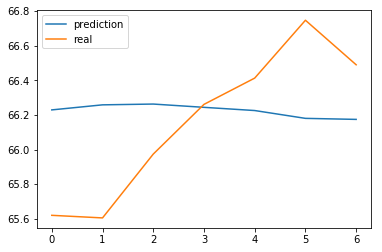

In [363]:
plt.plot(prediction_LS, label = "prediction")
plt.plot(y_test.values[0], label = "real")
plt.legend()

In [365]:
# Тестирование GridSearch
from sklearn.grid_search import GridSearchCV
alpha = [0.01, 0.05, 0.001, 0.1, 0.2, 0.5, 0.9, 1]
L = Lasso()
grid2 = GridSearchCV(estimator = L, param_grid={'alpha': alpha})
grid2.fit(X, y)
print(grid2)
print(grid2.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.05, 0.001, 0.1, 0.2, 0.5, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.01
